In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Problem 1
*Derive a formula for the overlap area of two circles as a function of their separation and radii. You need the formulae for the area of a triangle in terms of the length of the three sides (Heron’s formula), the law of cosines to derive the angles of intersection, and the area of a sector of a circle in terms of its angle*

<hr>

The general method for coming up with this was to draw a triangle between the centres of the bodies and the top point of intersection. The area of the overlap is found by summing the area of the sector of each body and subtracting the area of the total triangle (this all gives the top half of the overlapping area). The formula is defined as follows (where I assume $r_1 \ge r_2$)
\begin{equation}
    A_{\rm overlap}(a, r_1 ,r_2) = \begin{cases}
                                       \pi r_2^2 & a \le r_1 - r_2 \\
                                       0 & a \ge r_1 + r_2 \\
                                       2 (A_{\rm sec, 1} + A_{\rm sec, 2} - A_{\rm triangle})& \mathrm{else}
                                   \end{cases}
\end{equation}
where from the area of a sector and cosine rule we have
\begin{equation}
    A_{\rm sec, i} = \frac{1}{2} \theta_i r_i^2,\qquad \cos \theta_i = \frac{r_i^2 + a^2 - r_{3 - i}^2}{2 a r_i}
\end{equation}
and from Heron's formula we have that
\begin{equation}
    A_{\rm triangle} = \sqrt{s(s-a)(s-r_1)(s-r_2)},\qquad s = \frac{1}{2} (a + r_1 + r_2)
\end{equation}

This is implemented in `overlap_area(a, r1, r2)`.

In [45]:
def overlap_area_touching(a, r1, r2):
    """Find the overlap area for two circles where `r1 - r2 < a < r1 + r2`

    Parameters
    ----------
    a : `float/array`
        Separations
    r1 : `float`
        Radius of circle 1
    r2 : `float`
        Radius of circle 2

    Returns
    -------
    areas : `float/array`
        Areas of overlap at different separations
    """
    # find the angles using the cosine rule
    theta1 = np.arccos((a**2 + r1**2 - r2**2) / (2 * r1 * a))
    theta2 = np.arccos((a**2 + r2**2 - r1**2) / (2 * r2 * a))

    # use the angles to find the sector areas
    sec1 = 0.5 * theta1 * r1**2
    sec2 = 0.5 * theta2 * r2**2

    # use Heron's formula to get the area of the triangle
    s = 0.5 * (a + r1 + r2)
    triangle = np.sqrt(s * (s - r1) * (s - r2) * (s - a))

    return 2 * (sec1 + sec2 - triangle)


def overlap_area(a, r1, r2):
    """Find the overlap area for two circles of radii `r1` and `r2` at different separations `a`

    Parameters
    ----------
    a : `float/array`
        Separations
    r1 : `float`
        Radius of circle 1
    r2 : `float`
        Radius of circle 2

    Returns
    -------
    areas : `float/array`
        Areas of overlap at different separations
    """
    # set up area array and work out which radius is larger
    areas = np.zeros_like(a)
    r_min = min(r1, r2)
    r_max = max(r1, r2)

    # define lower and upper bounds
    lower = r_max - r_min
    upper = r_max + r_min

    # below the lower bound the area is just the area of the smaller circle
    areas[a < lower] = np.pi * r_min**2

    # above the upper bound the area there is no overlap
    areas[a >= upper] = 0

    # for the area in the range in-between we can use the formula we created
    touching = np.logical_and(a >= lower, a < upper)
    areas[touching] = overlap_area_touching(a[touching], r_max, r_min)

    return areas

# Problem 2
*Write a function to compute the transit/secondary eclipse of a body **without limb-darkening***
<hr>

In [ ]:
def 

# Problem 4

In [10]:
planet = pd.read_csv("mystery_planet02.txt", delim_whitespace=True, names=["time", "I", "I_err"])

In [39]:
period_range = np.linspace(0.1, 15, 10000)
least_squares = np.zeros_like(period_range)

# loop over each period
for i, period in enumerate(period_range):
    # folder the data on this period
    folded_time = planet["time"].values % period

    # sort the data by new folded times
    order = np.argsort(folded_time)
    folded_time = folded_time[order]
    brightnesses = planet["I"][order].values

    # calculate the sum of the squares for this period
    least_squares[i] = np.sum(((brightnesses[1:] - brightnesses[:-1]))**2)

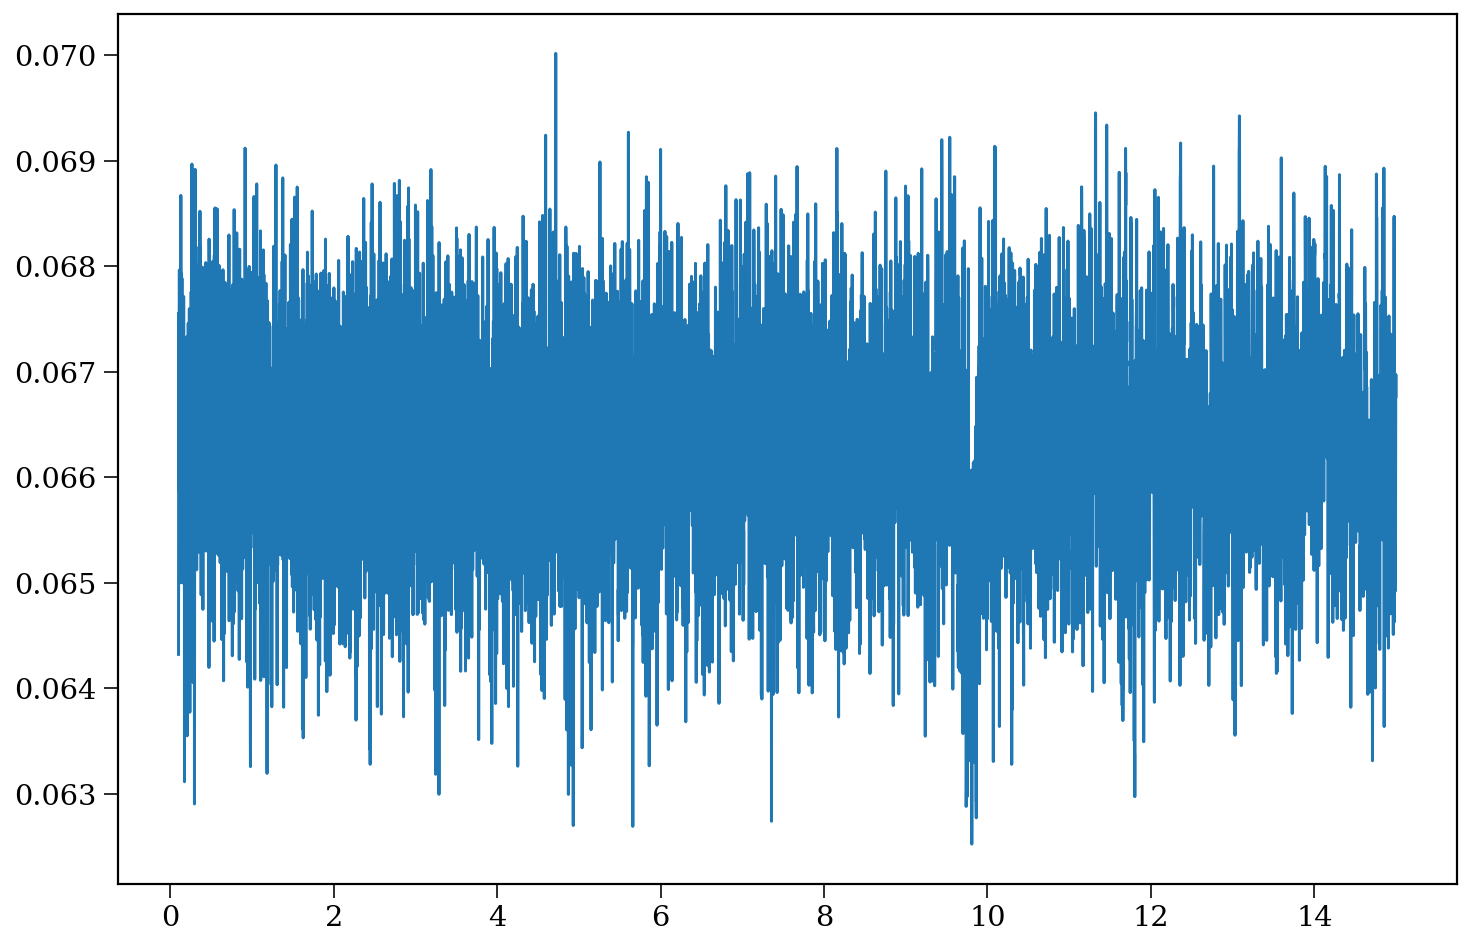

In [40]:
plt.plot(period_range, least_squares)

In [46]:
best_period = period_range[least_squares.argmin()]

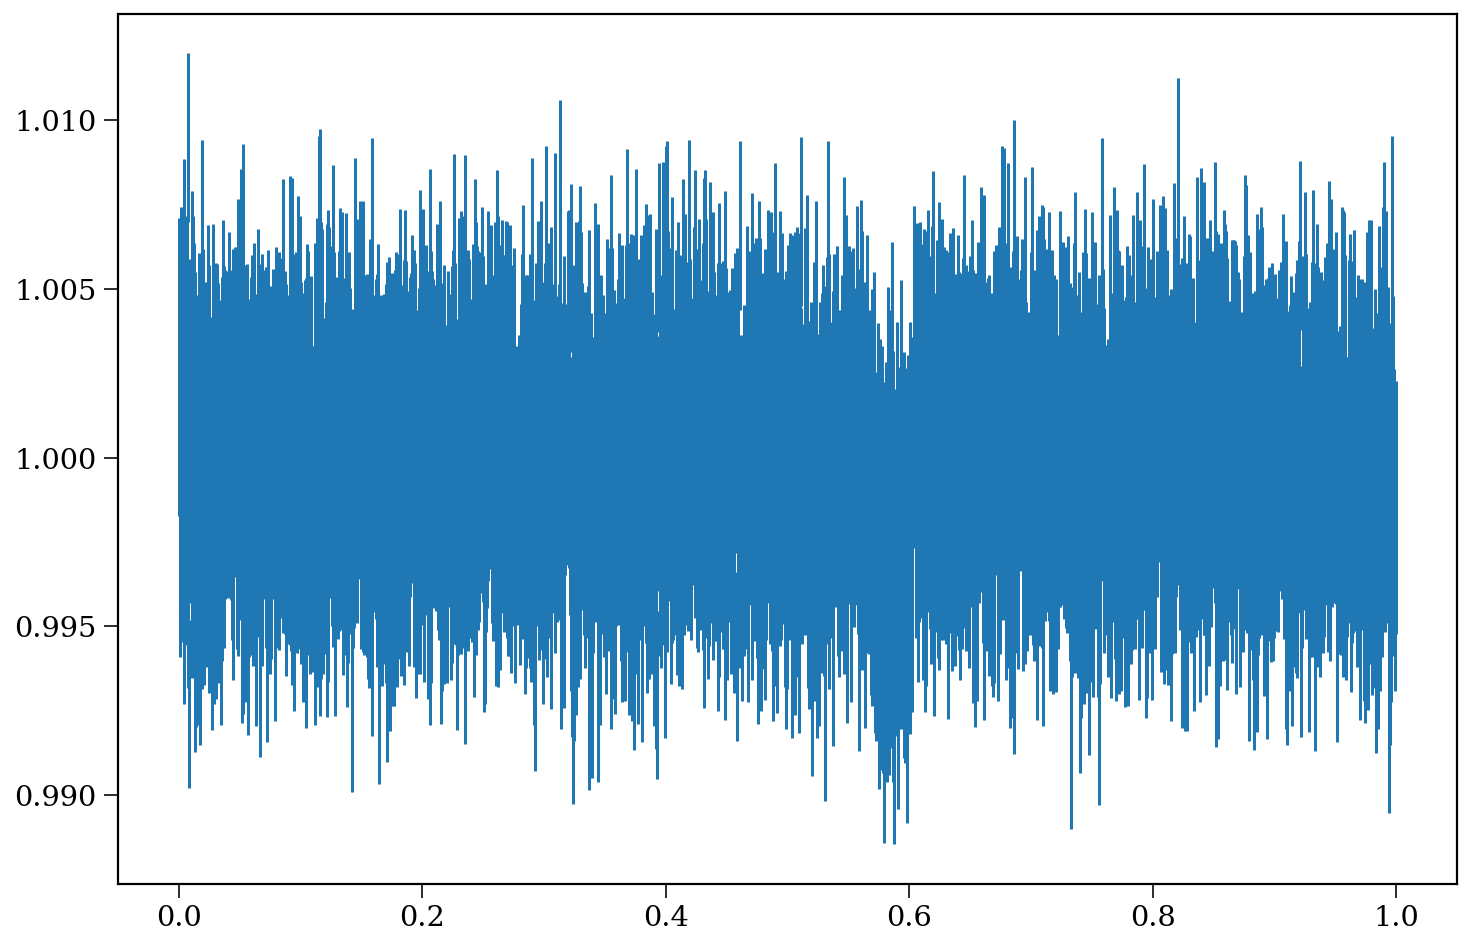

In [49]:
plt.errorbar(x=(planet["time"] % best_period) / best_period, y=planet["I"], yerr=planet["I_err"], marker="o", markersize=0.3, ls="none")
plt.show()